## Visualising my dataset

In [2]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

from model import *

In [3]:
#load the data
data = load_data('../simulations/datasets/r1_n=3_dim=2_nt=1000_dt=0.005')
X, y = data

In [4]:
X.shape

torch.Size([1000000, 3, 6])

X contains [number of points, number of particles/nodes, particle features]

In [11]:
X[0][0]

tensor([ 1.0040, -0.9063, -0.7482, -1.1714, -0.8712,  1.8019])

In [ ]:
X[:,:,-1] #mass tensor

tensor([[1.8019, 1.1429, 0.6232],
        [0.3077, 2.6222, 0.9331],
        [1.0191, 5.8481, 0.4055],
        ...,
        [2.2248, 0.8093, 0.6181],
        [0.8860, 0.3742, 0.5677],
        [0.2121, 2.0045, 1.1022]])

Particle features:
$x, y, \Delta x, \Delta y, q, m$

Data shape: 1000000 points, 3 particles, 6 features


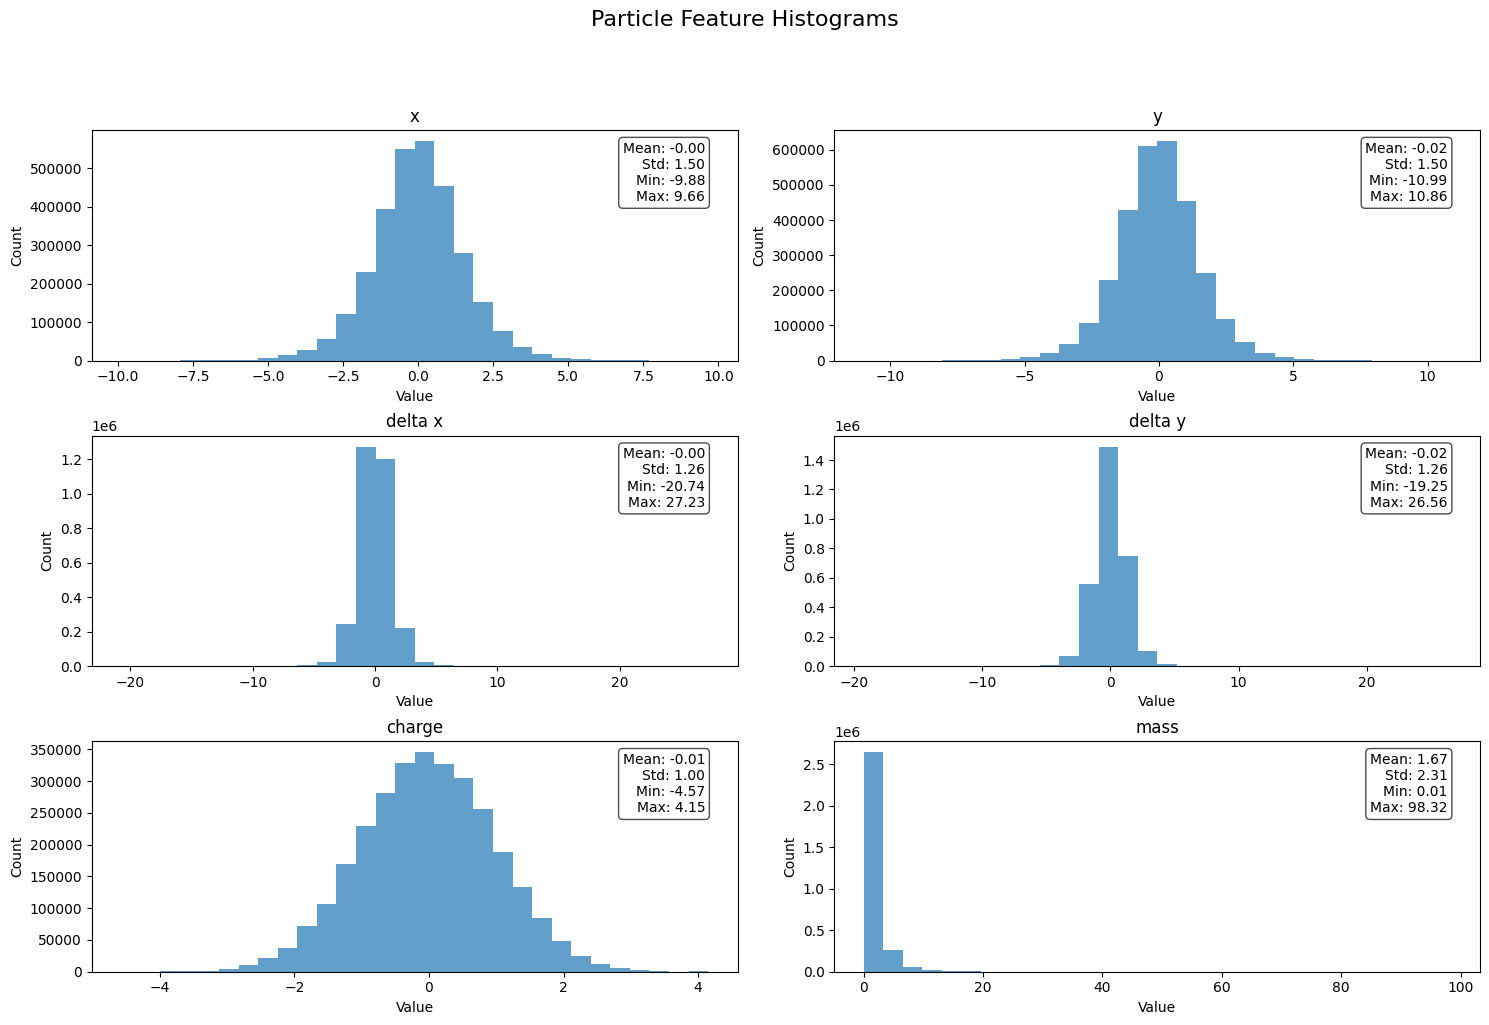

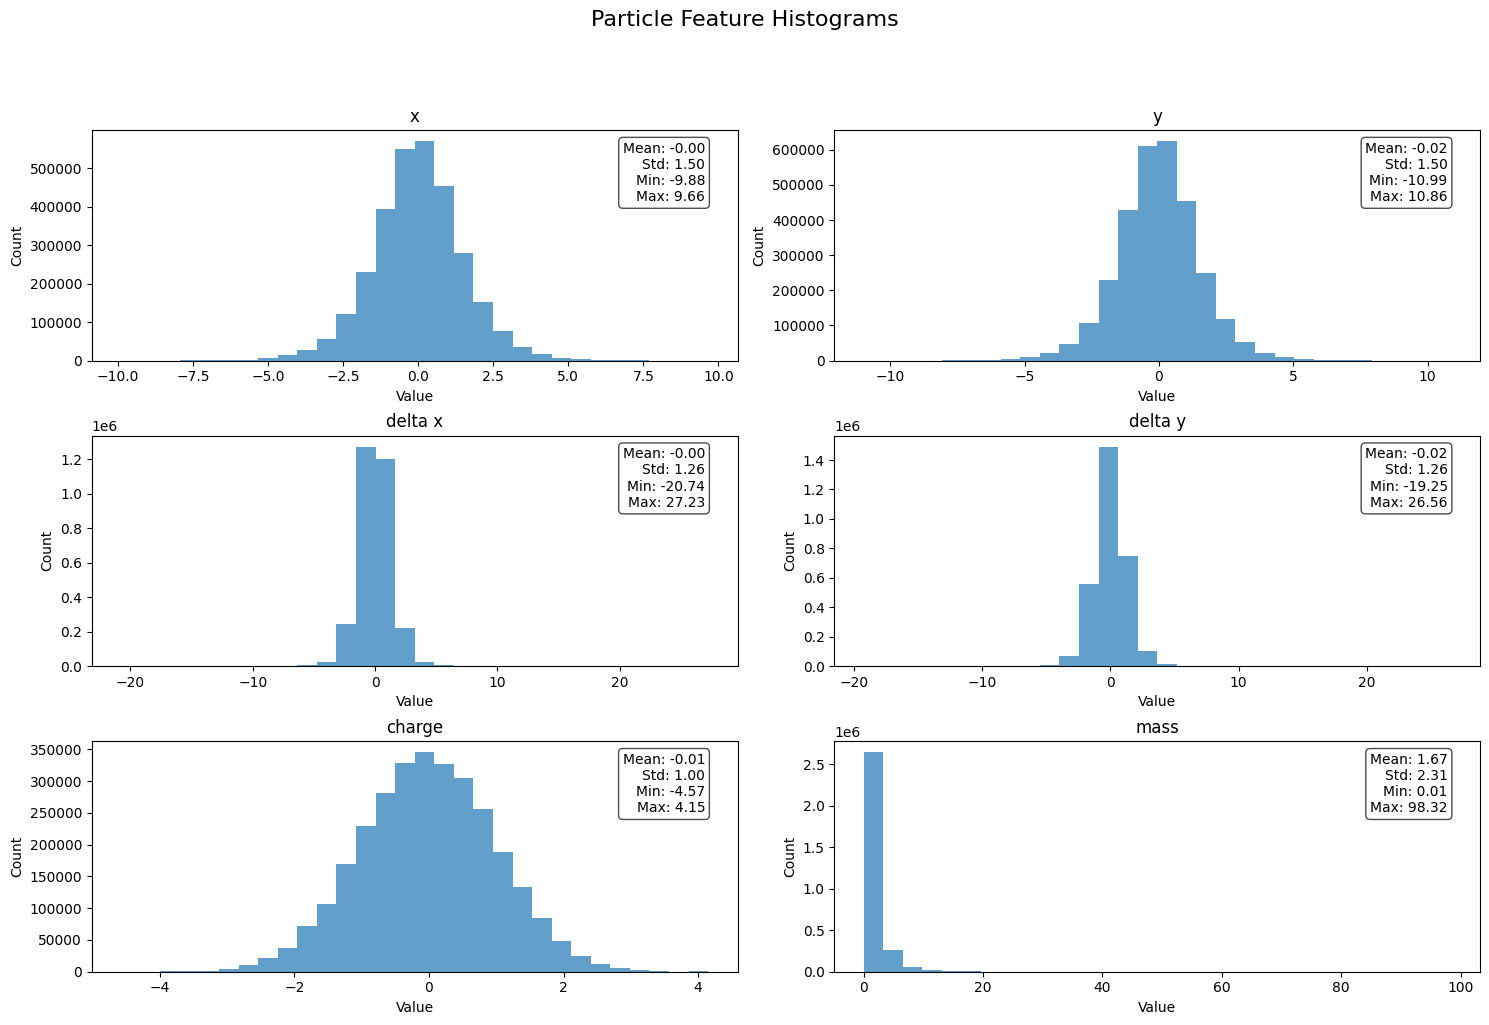

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def plot_particle_feature_histograms(X, n_bins=30): 
    #X is shape [no data points, no particles, no features]

    # Get dimensions
    n_points, n_particles, n_features = X.shape
    print(f"Data shape: {n_points} points, {n_particles} particles, {n_features} features")
    
    # Create a figure with subplots
    fig = plt.figure(figsize=(15, 10))
    gs = GridSpec(3, 2, figure=fig)
    
    # Extract all values for each feature
    feature_data = []
    for feature in range(n_features):
        # Flatten all points and particles for this feature
        values = X[:, :, feature].flatten()
        feature_data.append(values)
    
    # Create histograms for each feature
    for feature in range(n_features):
        feature_names = ['x', 'y', 'delta x', 'delta y', 'charge', 'mass']
        ax = fig.add_subplot(gs[feature//2, feature%2])
        values = feature_data[feature]
        
        # Calculate basic statistics
        min_val = np.min(values)
        max_val = np.max(values)
        mean_val = np.mean(values)
        std_val = np.std(values)
        
        # Plot histogram
        counts, bins, patches = ax.hist(values, bins=n_bins, alpha=0.7)
        
        # Add statistics and labels
        ax.set_title(f'{feature_names[feature]}')
        ax.set_xlabel('Value')
        ax.set_ylabel('Count')
        
        # Add text with statistics
        stats_text = (f"Mean: {mean_val:.2f}\nStd: {std_val:.2f}\n"
                     f"Min: {min_val:.2f}\nMax: {max_val:.2f}")
        ax.text(0.95, 0.95, stats_text, transform=ax.transAxes,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
    plt.tight_layout()
    plt.suptitle('Particle Feature Histograms', fontsize=16, y=1.02)
    plt.subplots_adjust(top=0.9)
    plt.show()
    
    return fig

plot_particle_feature_histograms(X.numpy())